In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly, Stations
import pandas as pd
import seaborn as sns

df = pd.read_csv('2011_2024.csv', dtype={'location_zipcode': str})

In [2]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['year'] = df['open_dt'].dt.year
df['month'] = df['open_dt'].dt.month

df['year_month'] = df['open_dt'].dt.to_period('M')

complaints_per_month = df.groupby('year_month').size()

complaints_per_month = complaints_per_month[:-2]


In [3]:
boston = Point(42.3601, -71.0589)

start = datetime(2011, 7, 1)
end = datetime(2023, 12, 31)

data = Monthly(boston, start, end)
data = data.fetch()
print(type(data))
data['complaints'] = complaints_per_month.values

#data.plot(y=['tavg', 'complaints'])
#plt.show()


<class 'pandas.core.frame.DataFrame'>


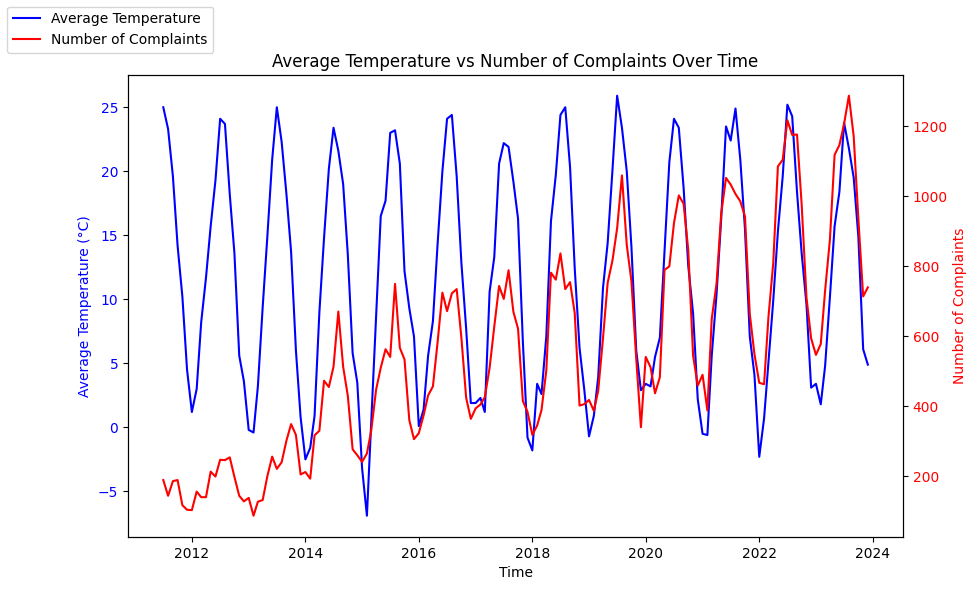

In [4]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary y-axis
ax1.plot(data.index, data['tavg'], label='Average Temperature', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Average Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
ax2.plot(data.index, data['complaints'], label='Number of Complaints', color='red')
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Average Temperature vs Number of Complaints Over Time')
fig.legend(loc='upper left')

# Show plot
plt.show()


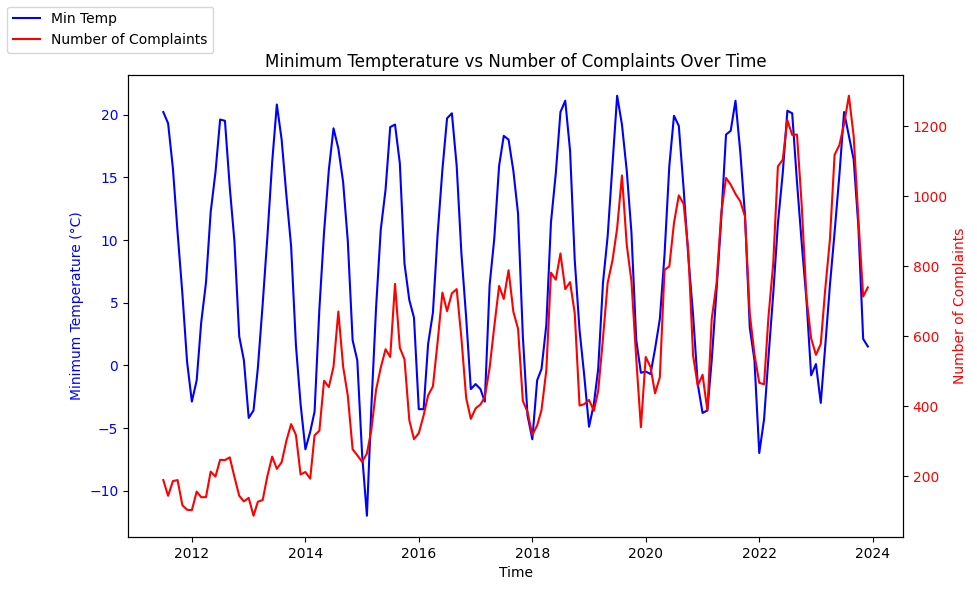

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data.index, data['tmin'], label='Min Temp', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Minimum Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data.index, data['complaints'], label='Number of Complaints', color='red')
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Minimum Tempterature vs Number of Complaints Over Time')
fig.legend(loc='upper left')

plt.show()


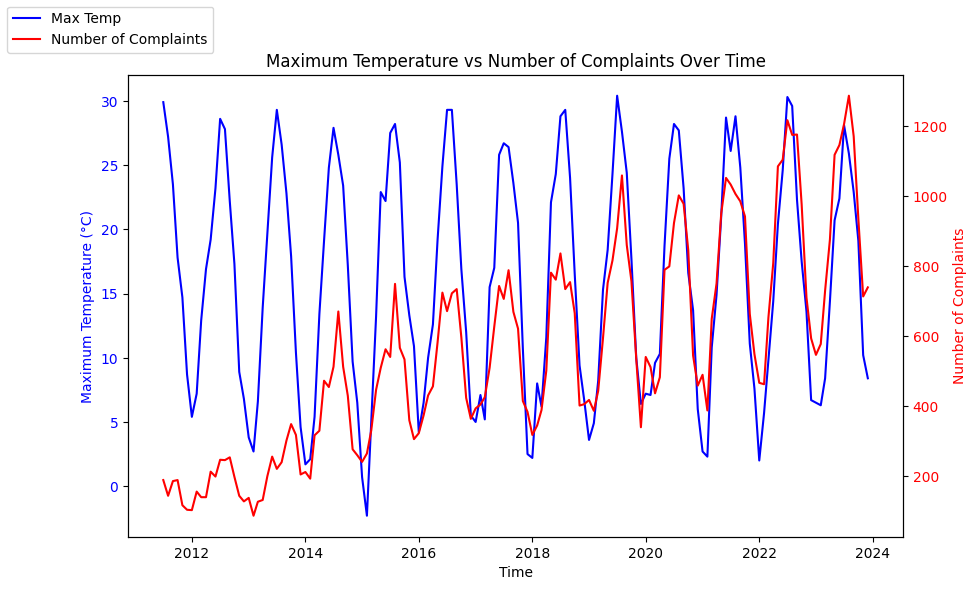

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data.index, data['tmax'], label='Max Temp', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Maximum Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data.index, data['complaints'], label='Number of Complaints', color='red')
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Maximum Temperature vs Number of Complaints Over Time')
fig.legend(loc='upper left')
plt.show()

In [7]:
from meteostat import Daily, Point

# Define the coordinates of Boston
boston = Point(42.3601, -71.0589)
start = datetime(2011, 7, 1)
end = datetime(2023, 12, 31)

# Fetch daily weather data for Boston
daily_data = Daily(boston, start, end)
daily_data = daily_data.fetch()

# snowfall_data = daily_data.loc[:, ['snow']]
# precep_data = daily_data.loc[:, ['prcp']]

df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract year, month, and day separately
df['year'] = df['open_dt'].dt.year
df['month'] = df['open_dt'].dt.month
df['day'] = df['open_dt'].dt.day

# Create a new column to represent year, month, and day combined
df['year_month_day'] = df['open_dt'].dt.to_period('D')

# Group by year, month, and day and count complaints
complaints_per_day = df.groupby('year_month_day').size()

complaints_per_day = complaints_per_day[:-19]

daily_data['complaints'] = complaints_per_day.values

In [8]:
average_complaints_per_day = daily_data['complaints'].mean()
average_complaints_per_day

18.259032187431576

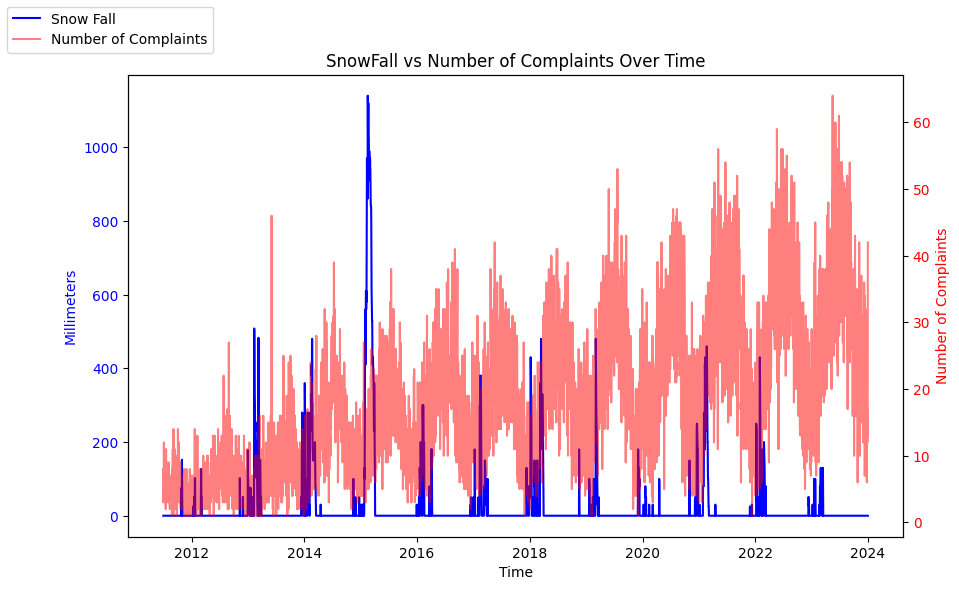

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(daily_data.index, daily_data['snow'], label='Snow Fall', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Millimeters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['complaints'], label='Number of Complaints', color='red', alpha=0.5)
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('SnowFall vs Number of Complaints Over Time')
fig.legend(loc='upper left')
plt.show()

In [10]:
# Convert the index to datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Group by month and calculate the mean snowfall for each month
monthly_avg_snowfall = daily_data.resample('M').mean()['snow']
monthly_avg_rain = daily_data.resample('M').mean()['prcp']

data['monthly_snow'] = monthly_avg_snowfall.values
data['monthly_rain'] = monthly_avg_rain.values

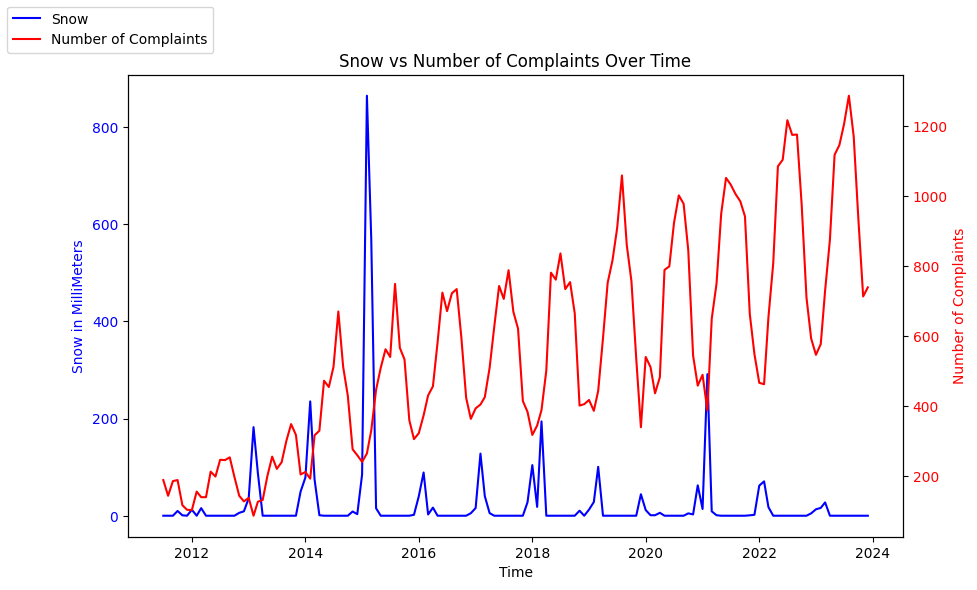

In [11]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data.index, data['monthly_snow'], label='Snow', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Snow in MilliMeters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data.index, data['complaints'], label='Number of Complaints', color='red')
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Snow vs Number of Complaints Over Time')
fig.legend(loc='upper left')
plt.show()

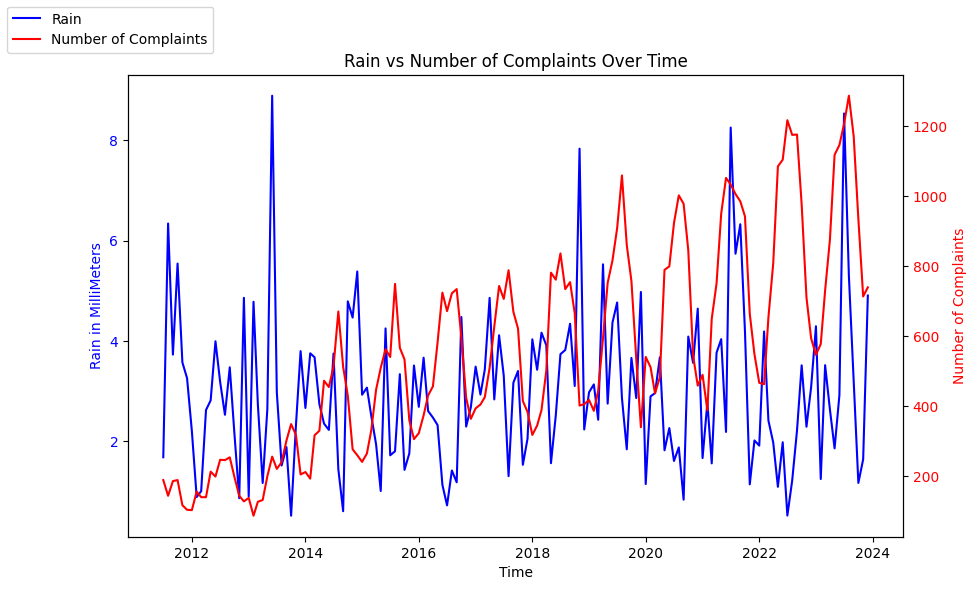

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(data.index, data['monthly_rain'], label='Rain', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain in MilliMeters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data.index, data['complaints'], label='Number of Complaints', color='red')
ax2.set_ylabel('Number of Complaints', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Rain vs Number of Complaints Over Time')
fig.legend(loc='upper left')
plt.show()

In [13]:
df2 = pd.read_csv('northeastern_winter_storms.csv')

df2 = df2[79:]
df2 = df2['Date']

In [14]:
import re
import pandas as pd

def parse_date_range(date_range):
    start_date, end_date = date_range.split('–')
    month, first_date = start_date.split(' ')
    second_date, year = end_date.split(',')

    start_date =  month + " " + first_date + year
    end_date = month + " " + second_date + year
    print(start_date)
    print(end_date)

    dates_list = pd.date_range(start=start_date, end=end_date)    
    return dates_list
    

# Manually changed
date_ranges = [
    "January 6–16, 2011",
    "January 23–31, 2011",
    "February 1–6, 2011",
    "October 25–31, 2011",
    "November 1–2, 2011",
    "February 4–13, 2013",
    "March 1–12, 2013",
    "December 10–19, 2013",
    "January 18–25, 2014",
    "February 8–17, 2014",
    "November 23–30, 2014",
    "December 6–17, 2014",
    "January 22–31, 2015",
    "February 5–15, 2015",
    "January 19–27, 2016",
    "March 9–18, 2017",
    "January 1–8, 2018",
    "February 26–28, 2018",
    "March 1–6, 2018",
    "March 7–11, 2018",
    "March 11–17, 2018",
    "March 18–25, 2018",
    "December 11–21, 2020",
    "December 28–31, 2021",
    "January 1–6, 2022",
    "December 27–31, 2013",
    "January 1–6, 2014",
    "January 25–31, 2014",
    "February 1–7, 2014",
    "January 27–31, 2015",
    "February 1–5, 2015",
    "January 26–31, 2021",
    "February 1–5, 2021"
]

# Create an empty list to store individual dates
all_dates = []

#Iterate through each date range and parse dates
for date_range in date_ranges:
    dates_list = parse_date_range(date_range)
    all_dates.extend(dates_list)



January 6 2011
January 16 2011
January 23 2011
January 31 2011
February 1 2011
February 6 2011
October 25 2011
October 31 2011
November 1 2011
November 2 2011
February 4 2013
February 13 2013
March 1 2013
March 12 2013
December 10 2013
December 19 2013
January 18 2014
January 25 2014
February 8 2014
February 17 2014
November 23 2014
November 30 2014
December 6 2014
December 17 2014
January 22 2015
January 31 2015
February 5 2015
February 15 2015
January 19 2016
January 27 2016
March 9 2017
March 18 2017
January 1 2018
January 8 2018
February 26 2018
February 28 2018
March 1 2018
March 6 2018
March 7 2018
March 11 2018
March 11 2018
March 17 2018
March 18 2018
March 25 2018
December 11 2020
December 21 2020
December 28 2021
December 31 2021
January 1 2022
January 6 2022
December 27 2013
December 31 2013
January 1 2014
January 6 2014
January 25 2014
January 31 2014
February 1 2014
February 7 2014
January 27 2015
January 31 2015
February 1 2015
February 5 2015
January 26 2021
January 31 2

In [15]:
# date_ranges = [
#     "January 9–13, 2011",
#     "January 26–27, 2011",
#     "February 1–3, 2011",
#     "October 28–30, 2011",
#     "February 7–10, 2013",
#     "March 4–9, 2013",
#     "December 13–16, 2013",
#     "January 20–22, 2014",
#     "February 11–14, 2014",
#     "November 26–28, 2014",
#     "December 9–14, 2014",
#     "January 25–28, 2015",
#     "February 8–11, 2015",
#     "January 22–24, 2016",
#     "March 12–15, 2017",
#     "January 3–5, 2018",
#     "March 1–3, 2018",
#     "March 5–8, 2018",
#     "March 11–15, 2018",
#     "March 20–22, 2018",
#     "December 14–18, 2020",
#     "January 1–3, 2022",
#     "December 30–31, 2013",
#     "January 1–3, 2014",
#     "January 29–31, 2014",
#     "February 1–4, 2014",
#     "January 29–31, 2015",
#     "February 1–3, 2015",
#     "January 29–31, 2021",
#     "February 1–3, 2021"
# ]

In [16]:
import numpy as np

num_complaints_array = np.zeros(len(all_dates), dtype=int)

# Iterate over each desired date and count complaints for each date
for i, date in enumerate(all_dates):
    complaints_on_date = df[df['open_dt'].dt.date == date.date()]  # Filter complaints for the specific date
    num_complaints = len(complaints_on_date)  # Count the number of complaints for the date
    num_complaints_array[i] = num_complaints

print("Number of complaints for each date:")
print(num_complaints_array)

Number of complaints for each date:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  8  5  3  5  3  4  3  2  5  5  4  1  4  0  0  0  1  3  5  7  6  8
  6  6  5  1  0  1  6  2  7  4  2  4  6  8  4  3  0  2  3  3  9 12  7  1
  4 10  7  4  8  2  4  3  7  6 17  7  8 15 10 10  4  5  2  3 10 10 16 12
  7  7  7  8  5  4  8 10  8 17 15  6  7  4  6 13 11  4  6  6  9  9  6 11
 14  4  9 18 11  6  4  7 10  7 12 13  5  7 14 16 10  4 10  6  7  5 10 11
 13  7 13  5  7  5  4  6 16 18 12 22 11  6 17 14 12 10 11  9  4 11 11 11
 12  6  9  4  9 11 10  6 24 16 10 23 18 10 20 15 33  8 14 20  4  6 13  8
 15 14 29 20 18 15 11 20 17 23 15  7  4 12 10 10  8  0  4  6  7  6  7  7
 14 10  6  6  7 15 16  3  4  2  3  2  6 13 11  4  6  7  9  4  6  6 24  4
  9  3 17 12  6  8 16 17 11]


In [17]:
daily_data = daily_data[100:-400]

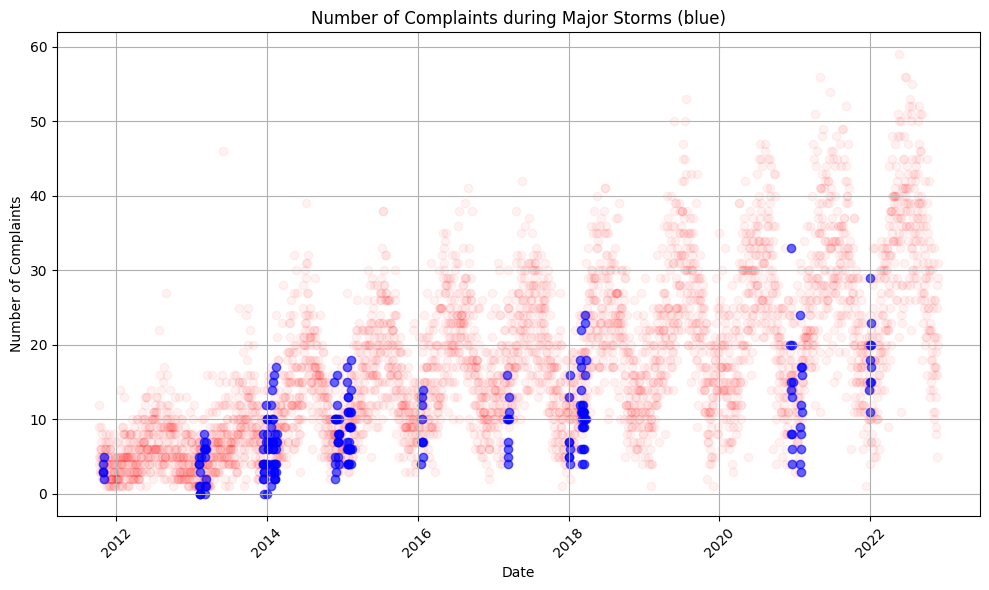

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming all_dates and num_complaints_array are already defined
# Convert all_dates to numpy array for sorting
all_dates_np = np.array(all_dates)
num_complaints_np = np.array(num_complaints_array)

# Sort the data based on dates
sorted_indices = np.argsort(all_dates_np)
sorted_dates = all_dates_np[sorted_indices]
sorted_num_complaints = num_complaints_np[sorted_indices]

sorted_dates = sorted_dates[30:]
sorted_num_complaints = sorted_num_complaints[30:]

# Plot the sorted data as scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_data.index, daily_data['complaints'], label='Number of Complaints (Daily)', color='red', alpha=0.05)
plt.scatter(sorted_dates, sorted_num_complaints, marker='o', color='blue', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints during Major Storms (blue)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


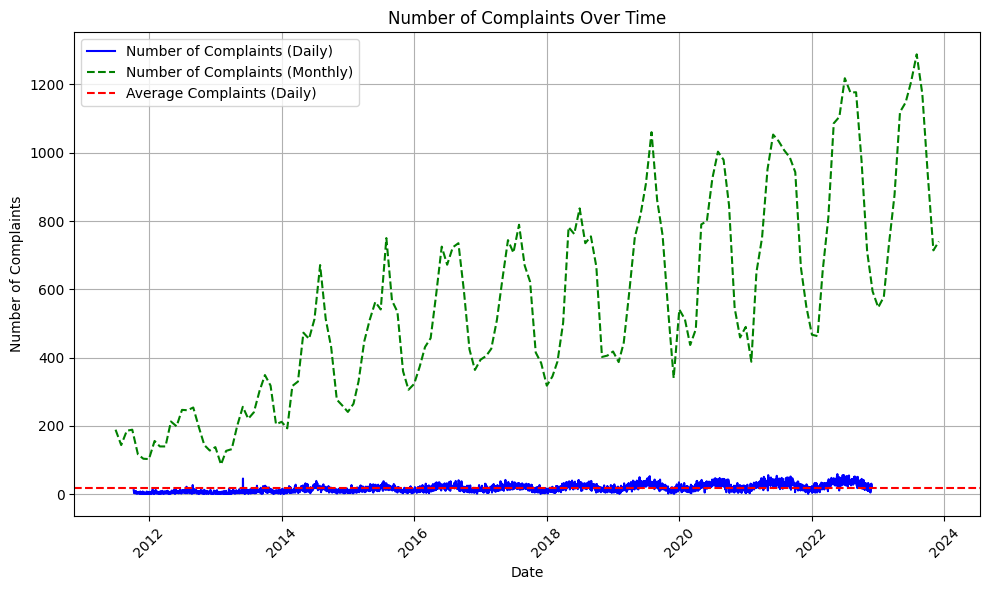

In [19]:
import matplotlib.pyplot as plt

# Assuming daily_data['complaints'] contains the number of complaints per day
# and data['complaints'] contains the number of complaints per month
average_complaints_per_day = daily_data['complaints'].mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['complaints'], label='Number of Complaints (Daily)', color='blue')
plt.plot(data.index, data['complaints'], label='Number of Complaints (Monthly)', color='green', linestyle='--')
plt.axhline(y=average_complaints_per_day, color='red', linestyle='--', label='Average Complaints (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
